## Ejercicio breast cancer de sklearn

1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Limpia los datos si es necesario
3. Dibuja con plotly los gráficos que creas necesarios para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import plotly.offline as py
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

In [2]:
cancer = datasets.load_breast_cancer()

In [3]:
print("Features:", cancer.feature_names)
print("Labels:", cancer.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']


In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
cancer_df = pd.DataFrame(data=np.c_[cancer.data, cancer.target],
columns = list(cancer.feature_names) + ['target'])

In [7]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**2. Limpia los datos si es necesario**

Estos datos ya han sido tratados y preparados por sklearn, no se observan datos nulos, ni duplicados, todos los datos son numéricos y están bien nombrados. No creo que sea necesaria más limpieza.

**3. Dibuja con plotly los gráficos que creas necesarios para entender los datos.**

In [8]:
mean_col = []
error_col = []
worst_col = []
area_col = []

for col in cancer_df.columns.tolist():
    if "area" in col:
        area_col.append(col)
    else:
        if col[:4] == "mean":
            mean_col.append(col)
        elif col[-5:] == "error":
            error_col.append(col)
        elif col[:5] == "worst":
            worst_col.append(col)

In [9]:
print(f"Divido las features en diferentes listas para hacer más fácil el estudio de estas:\n\n\
mean_col:\n{mean_col}\n\nerror_col:\n{error_col}\n\nworst_col:\n{worst_col}\n\narea_col:\n{area_col}")

Divido las features en diferentes listas para hacer más fácil el estudio de estas:

mean_col:
['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

error_col:
['radius error', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']

worst_col:
['worst radius', 'worst texture', 'worst perimeter', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

area_col:
['mean area', 'area error', 'worst area']


In [10]:
X = cancer_df.drop("target",1)
y = cancer_df["target"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_25588\1505173573.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [11]:
print(f"There are {len(y[y == 0])} entries for malignant cancer and {len(y[y == 1])} for benign")

There are 212 entries for malignant cancer and 357 for benign


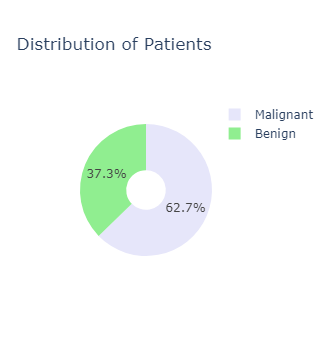

In [12]:
diagnosis = cancer_df['target'].value_counts()
diagnosis_size = diagnosis.values

colors = ['lavender', 'lightgreen']

trace = go.Pie(labels= ["Malignant", "Benign"],
              values = diagnosis_size,
              marker = dict(colors= colors),
              name = 'Breast Cancer',
              hole = 0.3)
df = [trace]
layout = go.Layout(title = 'Distribution of Patients')

fig = go.Figure(data = df, layout = layout)
fig.write_html("pie.html")
py.iplot(fig)

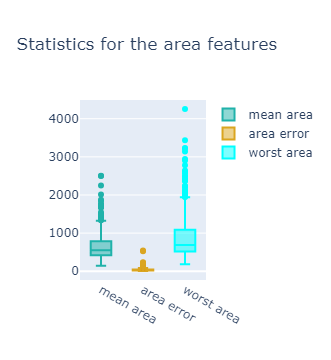

In [13]:
layout = go.Layout(title = "Statistics for the area features")
fig = go.Figure(layout = layout)

colors = ["lightseagreen", "goldenrod", "aqua"]

for i, elem in enumerate(area_col):
    fig.add_trace(go.Box(y=cancer_df[elem], name = elem,
                        marker_color = colors[i]))
fig.write_html("box.html")
fig.show()

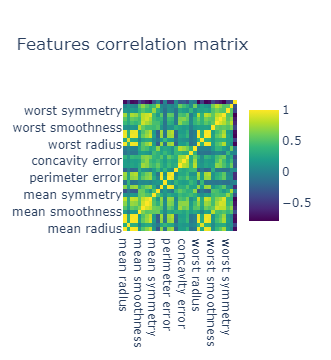

In [14]:
layout = go.Layout(title = "Features correlation matrix")
fig = go.Figure(data = go.Heatmap(x=cancer_df.corr().columns.tolist(),
                                 y=cancer_df.corr().columns.tolist(),
                                 z = np.array(cancer_df.corr()),
                                 colorscale = 'Viridis'),
               layout = layout)
fig.write_html("heatmap.html")
fig.show()

**4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados?** 

**5. Intenta superarte en el score cambiando las features de los algoritmos.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
pipe = Pipeline(steps=[('classifier', LogisticRegression())])

logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['none', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
}
kneighbors_params = {
    'classifier' : [KNeighborsClassifier()],
    'classifier__n_neighbors': [3, 5, 11, 19],
    'classifier__weights' : ["uniform", "distance"],
    'classifier__metric': ["euclidean", "manhattan"]
}
svm_params = {
    'classifier': [SVC()],
    'classifier__kernel': ('linear', 'rbf', 'sigmoid'),
    'classifier__C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'classifier__coef0': [-10, -1, 0, 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto')
}

# espacio de búsqueda

search_space = [logistic_params,
kneighbors_params,
svm_params]

In [17]:
%%time
cv = RepeatedKFold(n_splits=10, n_repeats = 1, random_state=1)

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=4, n_jobs=-1)

best_model = clf.fit(X_train, y_train)

separator = "\n#############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params:", clf.best_params_)
print(separator)
print("clf.best_score:", clf.best_score_)

filename = "finished_model.sav"
pickle.dump(best_model, open(filename, 'wb'))



Fitting 10 folds for each of 420 candidates, totalling 4200 fits

#############################

best estimator: SVC(C=0.6, coef0=-10, kernel='linear')

#############################

clf.best_params: {'classifier': SVC(C=0.6, coef0=-10, kernel='linear'), 'classifier__C': 0.6, 'classifier__coef0': -10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear'}

#############################

clf.best_score: 0.9559420289855073
CPU times: total: 14.7 s
Wall time: 12min 53s


In [18]:
with open("finished_model.sav", "rb") as f:
    loaded_model = pickle.load(f)

In [19]:
best_model.score(X_test, y_test) * 100

96.49122807017544

In [20]:
# probamos otras opciones

reg_log = Pipeline([
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())
])

rand_forest = RandomForestClassifier()

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

gbc = GradientBoostingClassifier()

knn = KNeighborsClassifier()

knn_scal = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

reg_log_param = {
    "reglog__penalty": ['none', 'l2'],
    "reglog__C": np.arange(0.1, 1, 0.1)
}

rand_forest_param = {
    'n_estimators': [10, 100, 300], # numero alto, no tiene por que dar overfitting
    'max_features': [2, 4, 6]
}

svm_param = {
    'svm__C': np.arange(0.2, 1, 0.1),
    'svm__kernel': ['linear', 'poly', 'rbf']
}

gbc_param = {
    'learning_rate': [0.05, 0.1, 0.5],
    'n_estimators': [20, 50, 100],
    'max_depth': [1,2,3,4,5]
}

knn_param = {
    'n_neighbors': [1,2,3,4,5,6]
}


knn_param_scal = {
    'knn__n_neighbors': [1,2,3,4,5,6]
}



In [21]:





gs_reg_log = GridSearchCV(reg_log,
                         reg_log_param,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

gs_rand_forest = GridSearchCV(rand_forest,
                         rand_forest_param,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

gs_svm = GridSearchCV(svm,
                         svm_param,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

gs_gbc = GridSearchCV(gbc,
                         gbc_param,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

gs_knn = GridSearchCV(knn,
                         knn_param,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

gs_knn_scal = GridSearchCV(knn_scal,
                         knn_param_scal,
                         cv=10,
                         verbose=1,
                         n_jobs=-1)

grids = {
    "gs_reg_log": gs_reg_log,
    "gs_rand_forest": gs_rand_forest,
    "gs_svm": gs_svm,
    "gs_gbc": gs_gbc,
    "gs_knn": gs_knn,
    "gs_knn_scal": gs_knn_scal    
}

In [22]:
%%time
for i,j in grids.items():
    j.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Fitting 10 folds for each of 9 candidates, totalling 90 fits
Fitting 10 folds for each of 24 candidates, totalling 240 fits
Fitting 10 folds for each of 45 candidates, totalling 450 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
Fitting 10 folds for each of 6 candidates, totalling 60 fits
CPU times: total: 5.5 s
Wall time: 2min 28s


In [23]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids,
columns = ["Grid", "Best Score"]).sort_values("Best Score", ascending=False)
best_grids

,Grid,Best Score
0,gs_reg_log,0.982367
2,gs_svm,0.978019
5,gs_knn_scal,0.969227
3,gs_gbc,0.966957
1,gs_rand_forest,0.960483
4,gs_knn,0.931884


In [24]:
gs_reg_log.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('reglog', LogisticRegression(C=0.30000000000000004))])

In [25]:
gs_reg_log.best_estimator_["reglog"].coef_

array([[-0.42336918, -0.61253174, -0.42809642, -0.40287854, -0.15400087,
         0.0779432 , -0.54832864, -0.55512242, -0.06520235,  0.38749976,
        -0.66019213,  0.28035242, -0.51640608, -0.54188628, -0.20663636,
         0.50233108,  0.05975292, -0.20387941,  0.16339098,  0.38387904,
        -0.65988195, -0.85569304, -0.6054365 , -0.59368971, -0.68175897,
        -0.07697725, -0.5842254 , -0.73418172, -0.60650908, -0.26542481]])